In [17]:
import numpy as np
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go 
import matplotlib.pyplot as plt 
import plotly as py 
from plotly import tools 
import seaborn as sns
from plotly.subplots import make_subplots
from datetime import datetime

# Crop production Analysis

In [2]:
df = pd.read_csv("/content/crop_production.csv")

In [3]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df.shape

(246091, 7)

In [5]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


## **EDA**

### Overall Crop Production By state

In [8]:
plt.figure(figsize=(10, 15))
temp = df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp, 'State_Name', 'Production')

<Figure size 720x1080 with 0 Axes>

### Productivity of different states

In [9]:
temp = df.groupby('State_Name')['Area', 'Production'].sum().reset_index()
temp['Production_Per_Unit_Area'] = temp['Production']/temp['Area']
temp = temp.sort_values(by='Production_Per_Unit_Area')
px.bar(temp, 'State_Name', 'Production_Per_Unit_Area', color='Production_Per_Unit_Area', )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### Overall production

In [10]:
temp = df.groupby(by='Crop_Year')['Production'].sum().reset_index()
px.line(temp, 'Crop_Year', 'Production')

### Average Crop Area through years¶

In [11]:
temp = df.groupby(by='Crop_Year')['Area'].mean().reset_index()
px.scatter(temp, 'Crop_Year', 'Area', color='Area', size='Area')

### Most and Least crop producing districts

In [12]:
fig = py.subplots.make_subplots(rows=1,cols=2,
                    subplot_titles=('Highest crop producing districts', 'Least overall crop producing districts'))

temp = df.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production')
temp1 = temp.tail()
trace1 = go.Bar(x= temp1['District_Name'], y=temp1['Production'])

temp1=temp.head()
trace2 = go.Bar(x= temp1['District_Name'], y=temp1['Production'])

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.show()
del temp,temp1

### Most produced crops

In [13]:
temp = df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp.tail(), 'Crop', 'Production')

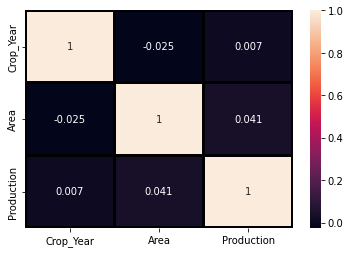

In [14]:
sns.heatmap(df.corr(),annot=True,linewidths=2,linecolor="black")

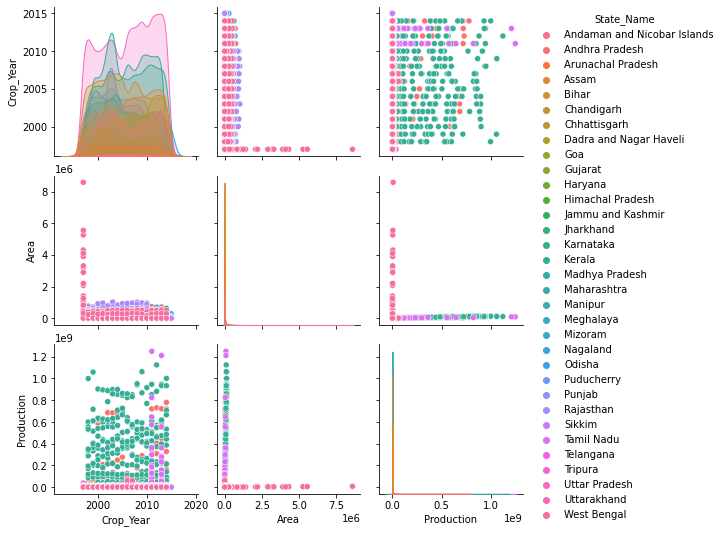

In [15]:
sns.pairplot(df,hue="State_Name")

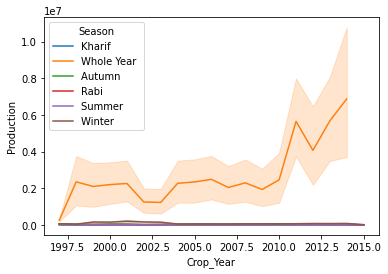

In [16]:
sns.lineplot(x="Crop_Year",y="Production",data=df,hue="Season")

### Crop Production Prediction

In [43]:
data1 = df.drop(["District_Name","Crop_Year"],axis=1)

In [44]:
data_dum = pd.get_dummies(data1)
data_dum[:5]

,Area,Production,Yearly Mean,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1751.333333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,667.666667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,807.666667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,939.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,961.666667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (162381, 165)
x_test : (79980, 165)
y_train : (162381, 1)
y_test : (79980, 1)


In [46]:
x_train[:5]

,Area,Yearly Mean,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
4843,785.0,1628.000000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20626,1250.0,1360.333333,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240277,2.0,740.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20664,60.0,908.333333,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157859,605.0,901.333333,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#random forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
preds = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [48]:
from sklearn.metrics import r2_score
r = r2_score(y_test,preds)
print("R2score when we predict using Randomn forest is ",r)

R2score when we predict using Randomn forest is  0.9980683734584809


In [49]:
#linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [50]:
preds = model.predict(x_test)

In [51]:
r2_score(y_test,preds)

0.9999999999999296

# Weather Analysis

In [22]:
data = pd.read_csv("/content/Weather Data in India from 1901 to 2017.csv")

In [23]:
data.head()

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [24]:
data = pd.read_csv("/content/Weather Data in India from 1901 to 2017.csv",index_col=0)

In [25]:
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [27]:
df1 = pd.melt(data, id_vars='YEAR', value_vars=data.columns[1:])
df1.head()

,YEAR,variable,value
0,1901,JAN,17.99
1,1902,JAN,19.00
2,1903,JAN,18.32
3,1904,JAN,17.77
4,1905,JAN,17.40


In [28]:
df1['Date'] = df1['variable'] + ' ' + df1['YEAR'].astype(str)  
df1.loc[:,'Date'] = df1['Date'].apply(lambda x : datetime.strptime(x, '%b %Y')) ## Converting String to datetime object
df1.head()

,YEAR,variable,value,Date
0,1901,JAN,17.99,1901-01-01
1,1902,JAN,19.00,1902-01-01
2,1903,JAN,18.32,1903-01-01
3,1904,JAN,17.77,1904-01-01
4,1905,JAN,17.40,1905-01-01


In [29]:
df1.columns=['Year', 'Month', 'Temprature', 'Date']
df1.sort_values(by='Date', inplace=True) ## To get the time series right.
fig = go.Figure(layout = go.Layout(yaxis=dict(range=[0, df1['Temprature'].max()+1])))
fig.add_trace(go.Scatter(x=df1['Date'], y=df1['Temprature']), )
fig.update_layout(title='Temprature Throught Timeline:',
                 xaxis_title='Time', yaxis_title='Temprature in Degrees')
fig.update_layout(xaxis=go.layout.XAxis(
    rangeselector=dict(
        buttons=list([dict(label="Whole View", step="all"),
                      dict(count=1,label="One Year View",step="year",stepmode="todate")                      
                     ])),
        rangeslider=dict(visible=True),type="date")
)
fig.show()

In [30]:
#Warmest /Coldest/Average :
fig = px.box(df1, 'Month', 'Temprature')
fig.update_layout(title='Warmest, Coldest and Median Monthly Tempratue.')
fig.show()

In [53]:
fig = px.scatter(df1, 'Date', 'Temprature', color='Month', 
                 color_discrete_sequence= ['blue','darkorchid','black','tomato','red','orange',
                                          'gold','crimson','hotpink','olive','darkgreen','dodgerblue'])
fig.update_layout(title='Temperature Clusturs of Months:',
                 xaxis_title = 'Time', yaxis_title='Temperature')
fig.show()

In [54]:
fig = px.histogram(x=df1['Temprature'], nbins=200, histnorm='density')
fig.update_layout(title='Frequency chart of temperature readings:',
                 xaxis_title='Temperature', yaxis_title='Count')

In [33]:
#yearly average temprature.

In [55]:
data['Yearly Mean'] = data.iloc[:,1:].mean(axis=1) ## Axis 1 for row wise and axis 0 for columns.
fig = go.Figure(data=[
    go.Scatter(name='Yearly Temperatures' , x=data['YEAR'], y=data['Yearly Mean'], mode='lines'),
    go.Scatter(name='Yearly Temperatures' , x=data['YEAR'], y=data['Yearly Mean'], mode='markers')
])
fig.update_layout(title='Yearly Mean Temperature :',
                 xaxis_title='Time', yaxis_title='Temperature in Degrees')
fig.show()

In [58]:
#Monthly temperatues throught history.
fig = px.line(df1, 'Year', 'Temprature', facet_col='Month', facet_col_wrap=4)
fig.update_layout(title='Monthly temperature throught history:')
fig.show()

### Seasonal Analysis

In [37]:
data['Winter'] = data[['DEC', 'JAN', 'FEB']].mean(axis=1)
data['Summer'] = data[['MAR', 'APR', 'MAY']].mean(axis=1)
data['Monsoon'] = data[['JUN', 'JUL', 'AUG', 'SEP']].mean(axis=1)
data['Autumn'] = data[['OCT', 'NOV']].mean(axis=1)
seasonal_df = data[['YEAR', 'Winter', 'Summer', 'Monsoon', 'Autumn']]
seasonal_df = pd.melt(seasonal_df, id_vars='YEAR', value_vars=seasonal_df.columns[1:])
seasonal_df.columns=['Year', 'Season', 'Temprature']

In [38]:
fig = px.scatter(seasonal_df, 'Year', 'Temprature', facet_col='Season', facet_col_wrap=2, trendline='ols')
fig.update_layout(title='Seasonal mean tempratures throught years:')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [39]:
px.scatter(df1, 'Month', 'Temprature', size='Temprature', animation_frame='Year')

### Forecasting

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 

df2 = df1[['Year', 'Month', 'Temprature']].copy()
df2 = pd.get_dummies(df2)
y = df2[['Temprature']]
x = df2.drop(columns='Temprature')

dtr = DecisionTreeRegressor()
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3)
dtr.fit(train_x, train_y)
pred = dtr.predict(test_x)
r2_score(test_y, pred)

0.9566232601001944

In [41]:
next_Year = df1[df1['Year']==2017][['Year', 'Month']]
next_Year.Year.replace(2017,2018, inplace=True)
next_Year= pd.get_dummies(next_Year)
temp_2018 = dtr.predict(next_Year)

temp_2018 = {'Month':df1['Month'].unique(), 'Temprature':temp_2018}
temp_2018=pd.DataFrame(temp_2018)
temp_2018['Year'] = 2018
temp_2018

,Month,Temprature,Year
0,JAN,20.59,2018
1,FEB,20.35,2018
2,MAR,25.58,2018
3,APR,28.11,2018
4,MAY,30.41,2018
5,JUN,29.70,2018
6,JUL,28.18,2018
7,AUG,28.17,2018
8,SEP,28.11,2018
9,OCT,27.24,2018


In [42]:
forecasted_temp = pd.concat([df1,temp_2018], sort=False).groupby(by='Year')['Temprature'].mean().reset_index()
fig = go.Figure(data=[
    go.Scatter(name='Yearly Mean Temprature', x=forecasted_temp['Year'], y=forecasted_temp['Temprature'], mode='lines'),
    go.Scatter(name='Yearly Mean Temprature', x=forecasted_temp ['Year'], y=forecasted_temp['Temprature'], mode='markers')
])
fig.update_layout(title='Forecasted Temprature:',
                 xaxis_title='Time', yaxis_title='Temprature in Degrees')
fig.show()
